# Customer Purchasing Behaviours

### Project Overview

**Objective:** Explore customer purchasing behaviours and develop predictive models to analyze loyalty and spending patterns.

**Scope:** Investigate relationships between age, annual income, region, purchasing behaviour, and loyalty/spending metrics using regression techniques.

In [ ]:
#Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

### 1. Data Preparation

In [3]:
#Check if the file path exists
os.path.exists('./Data/CPB.csv')  

True

In [4]:
#Load dataset
cpb_df = pd.read_csv("./Data/CPB.csv")

In [5]:
cpb_df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [6]:
#Number of rows and columns
cpb_df.shape

(238, 7)

In [7]:
#Identify missing values and data type for each column
cpb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [8]:
#Check for null values
#How many missing (null) values are present in each column of the DataFrame
cpb_df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [9]:
#Check for duplicate rows
duplicates = cpb_df.duplicated().sum()
duplicates

0

In [10]:
#Drop column user_id as it is not relevant for the analysis
cpb_df = cpb_df.drop('user_id', axis=1)

### 2. Exploratory Data Analysis (EDA) 

In [11]:
cpb_df.describe()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,38.676471,57407.563025,425.630252,6.794118,19.798319
std,9.351118,11403.875717,140.052062,1.899047,4.562884
min,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,46.750000,66750.000000,527.500000,8.275000,23.000000
max,55.000000,75000.000000,640.000000,9.500000,28.000000


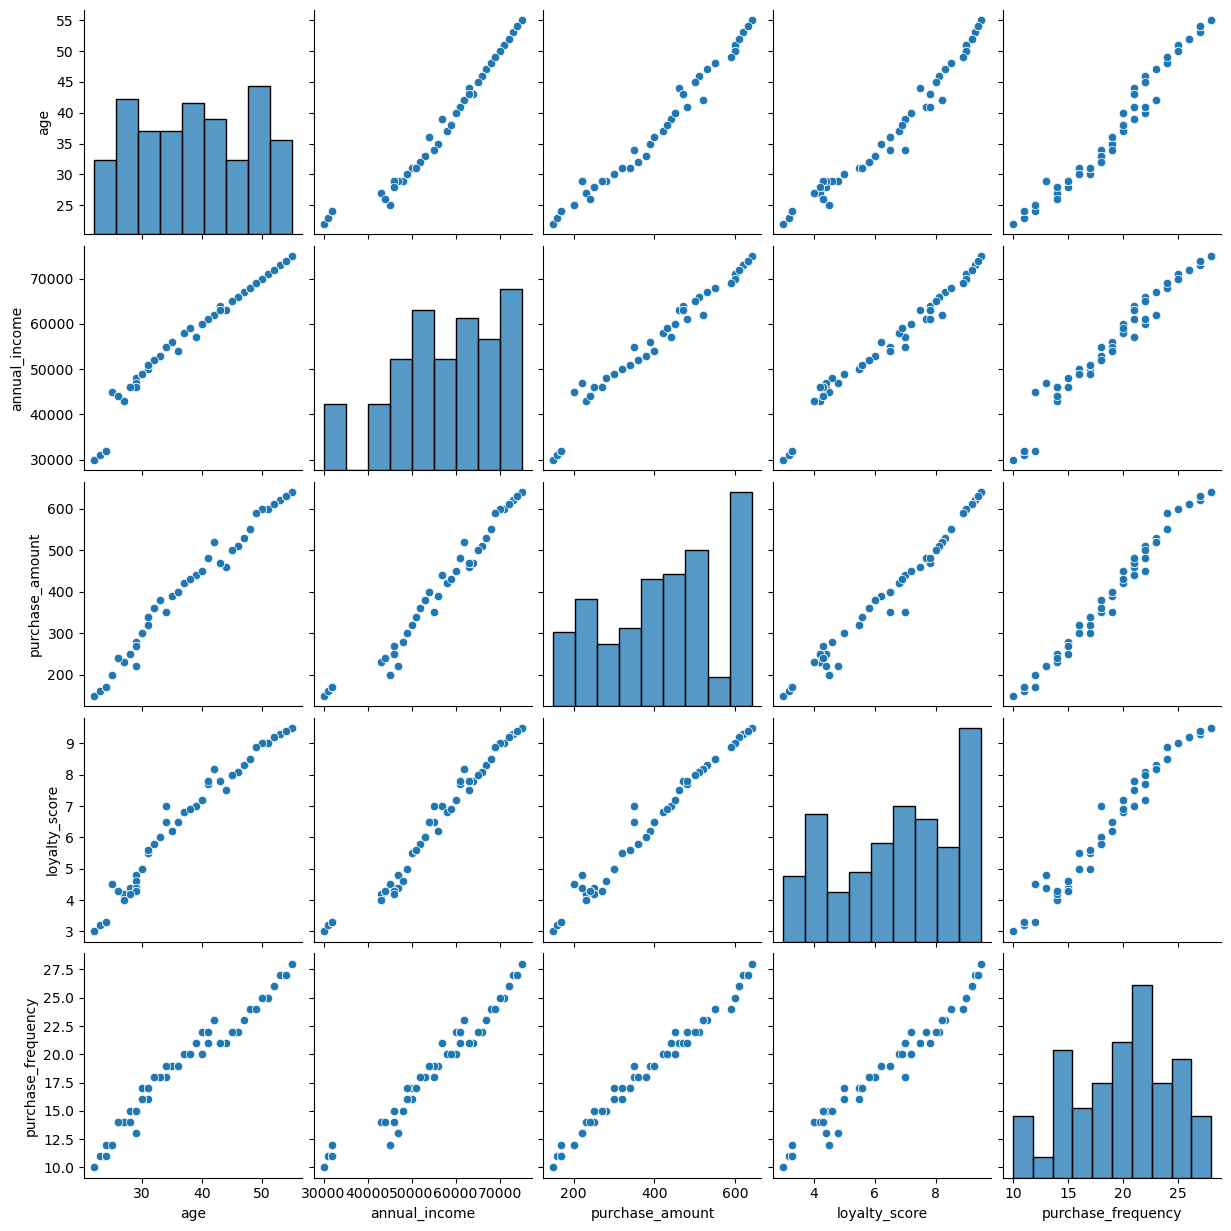

In [12]:
#Plot all the possible combinations
sns.pairplot(cpb_df)
plt.show()

In [84]:
cpb_df = cpb_df.drop('region', axis=1)

In [85]:
#Calculate correlation
CPB_corr = cpb_df.corr()
CPB_corr

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
age,1.000000,0.974833,0.986140,0.981835,0.980532
annual_income,0.974833,1.000000,0.984208,0.984351,0.982920
purchase_amount,0.986140,0.984208,1.000000,0.994147,0.993579
loyalty_score,0.981835,0.984351,0.994147,1.000000,0.986990
purchase_frequency,0.980532,0.982920,0.993579,0.986990,1.000000


<Axes: >

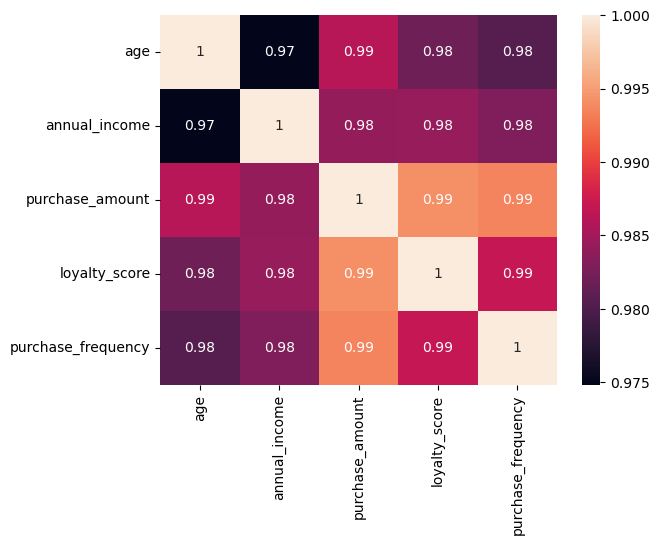

In [86]:
#Heatmap
ax=sns.heatmap(CPB_corr, annot = True)
ax

#### Target variable *Purchase Amount*

<Axes: xlabel='purchase_amount', ylabel='Count'>

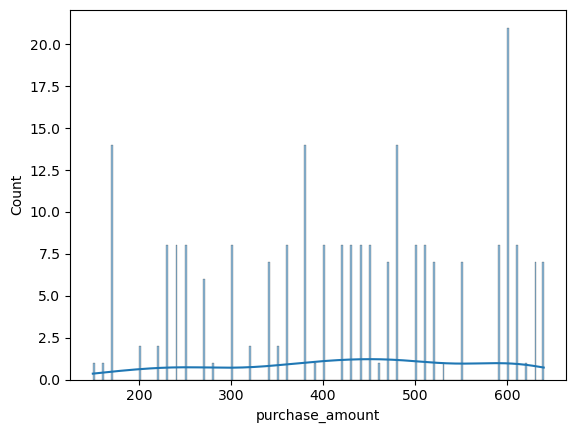

In [87]:
# Histogram and density function
sns.histplot(data = cpb_df['purchase_amount'] , binwidth=2 , kde = True )

<Axes: ylabel='purchase_amount'>

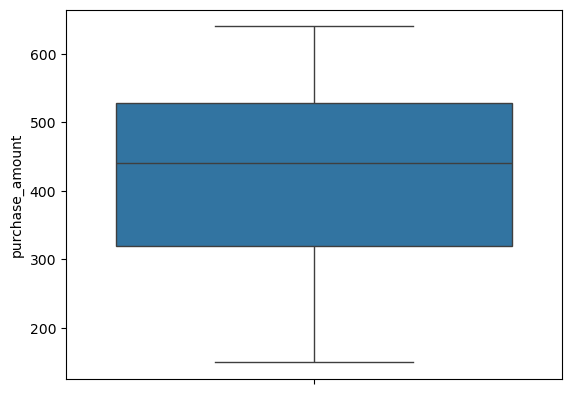

In [88]:
#Box PLot
sns.boxplot(data=cpb_df, y='purchase_amount')

#### Target variable *Loyalty Score*

<Axes: xlabel='loyalty_score', ylabel='Count'>

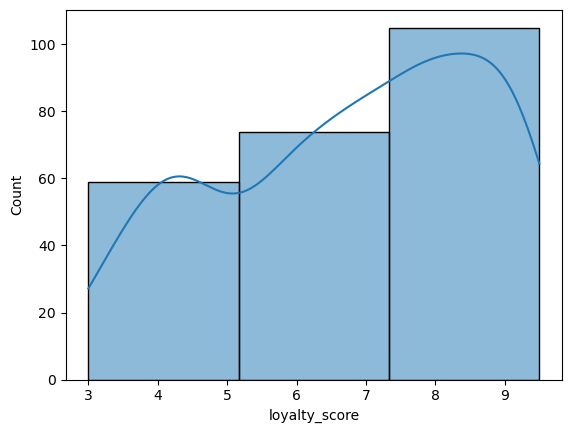

In [89]:
# Histogram and density function
sns.histplot(data = cpb_df['loyalty_score'] , binwidth=2 , kde = True )

<Axes: ylabel='loyalty_score'>

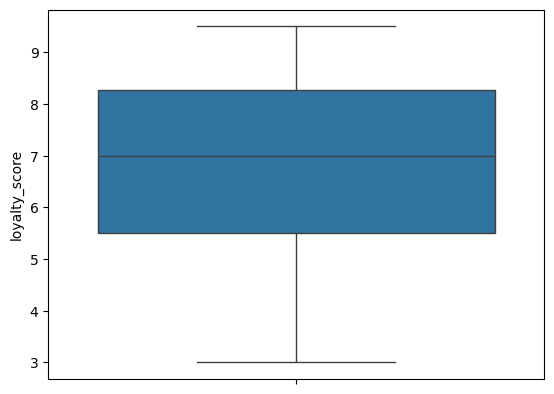

In [90]:
#Box PLot
sns.boxplot(data=cpb_df, y='loyalty_score')

### 3. Feature Engineering

In [ ]:
#Standardize columns

from sklearn.preprocessing import StandardScaler

#Initialize the StandardScaler
scaler = StandardScaler()

#specify the column that needs to be standarized
column_to_standardize = ['age','annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

#fit and transform the the column 'annul_income'
cpb_df[column_to_standardize] = scaler.fit_transform(cpb_df[column_to_standardize])

print(cpb_df)

One-hot encoding to 'Region' column

In [ ]:
#One-Hot encoding for the column 'Region' to create new binary columns for each unique region 

from sklearn.preprocessing import OneHotEncoder

#Initialize OneHot Encoder
encoder = OneHotEncoder(sparse_output=False)

#Apply encoding only to the 'region' column
region_encoded = encoder.fit_transform(cpb_df[['region']])


# Convert the encoded values into a DataFrame 
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['region']))


# Concatenate the original DataFrame (excluding 'region') with the new encoded columns
data = pd.concat([cpb_df.drop('region', axis=1), region_df], axis=1)

print(data.head())



In [ ]:
print(data.dtypes)

In [ ]:
#create a csv file to store the clean data
cpb_df.to_csv('processed_dataset.csv', index=False)